# 품목별 수출입실적 분석
- 데이터 읽기 (0~3행 skip)
- 상위 5개 데이터 확인하기
- 불필요한 행 삭제 및 인덱스 초기화
  - 0, 485 행 : '총계', '설명' 에 해당하는 row 삭제
  - 인덱스를 0부터 초기화
- 컬럼 데이터 타입 변경
  - 수출중량~무역수지 : Object 타입 ==> float으로 데이터 타입 변경
- 연도별 무역수지 평균 및 합계
- 연도별 무역수지가 가장 적은 품목은?

## 데이터 읽기

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('import_export.xls', skiprows=[0,1,2,3], engine='openpyxl')
# skiprows: 스킵할 행 번호 입력, engine: 파일 읽을 때 사용할 라이브러리
df.head()

,기간,품목명,품목코드,수출중량,수입중량,수출금액,수입금액,무역수지
0,총계,NaN,NaN,"967,575,781.9","2,886,113,032.4","2,985,863,296","2,852,488,115","133,375,181"
1,2018,살아 있는 동물,1.0,52.8,"1,362.8","3,188","73,643","-70,455"
2,2018,육과 식용 설육(屑肉),2.0,"32,982.9","1,220,751.0","38,226","5,123,574","-5,085,348"
3,2018,어류ㆍ갑각류ㆍ연체동물과 그 밖의 수생(水生) 무척추동물,3.0,"443,775.5","1,344,280.3","1,481,657","5,045,539","-3,563,882"
4,2018,"낙농품, 새의 알, 천연꿀, 다른 류로 분류되지 않은 식용인 동물성 생산품",4.0,"25,791.3","275,193.1","54,342","932,004","-877,662"


## 불필요한 행 삭제 및 인덱스 초기화- 
0, 485 행 : '총계', '설명' 에 해당하는 row 삭제- 
인덱스를 0부터 초기화

In [3]:
df = df.drop(0)
df.drop(len(df), inplace=True) # 마지막 행 삭제

In [44]:
df.drop([0, 485], inplace=True)
df

,기간,품목명,품목코드,수출중량,수입중량,수출금액,수입금액,무역수지
1,2018,살아 있는 동물,1.0,52.8,1362.8,3188,73643,-70455
2,2018,육과 식용 설육(屑肉),2.0,32982.9,1220751.0,38226,5123574,-5085348
3,2018,어류ㆍ갑각류ㆍ연체동물과 그 밖의 수생(水生) 무척추동물,3.0,443775.5,1344280.3,1481657,5045539,-3563882
4,2018,"낙농품, 새의 알, 천연꿀, 다른 류로 분류되지 않은 식용인 동물성 생산품",4.0,25791.3,275193.1,54342,932004,-877662
5,2018,다른 류로 분류되지 않은 동물성 생산품,5.0,33459.1,59282.8,87459,304607,-217148
...,...,...,...,...,...,...,...,...
480,2022,무기ㆍ총포탄과 이들의 부분품과 부속품,93.0,20316.2,1232.1,1290479,152485,1137994
481,2022,"가구, 침구ㆍ매트리스ㆍ매트리스 서포트(mattress support)ㆍ쿠션과 이와 ...",94.0,173519.8,788165.4,1391227,3953532,-2562305
482,2022,완구ㆍ게임용구ㆍ운동용구와 이들의 부분품과 부속품,95.0,24589.5,199833.0,551628,3097641,-2546013
483,2022,잡품,96.0,31377.8,109544.2,512519,1031415,-518896


In [4]:
# answer
df = df.reset_index(drop=True)  # 인덱스 초기화
df

,기간,품목명,품목코드,수출중량,수입중량,수출금액,수입금액,무역수지
0,2018,살아 있는 동물,1.0,52.8,"1,362.8","3,188","73,643","-70,455"
1,2018,육과 식용 설육(屑肉),2.0,"32,982.9","1,220,751.0","38,226","5,123,574","-5,085,348"
2,2018,어류ㆍ갑각류ㆍ연체동물과 그 밖의 수생(水生) 무척추동물,3.0,"443,775.5","1,344,280.3","1,481,657","5,045,539","-3,563,882"
3,2018,"낙농품, 새의 알, 천연꿀, 다른 류로 분류되지 않은 식용인 동물성 생산품",4.0,"25,791.3","275,193.1","54,342","932,004","-877,662"
4,2018,다른 류로 분류되지 않은 동물성 생산품,5.0,"33,459.1","59,282.8","87,459","304,607","-217,148"
...,...,...,...,...,...,...,...,...
479,2022,무기ㆍ총포탄과 이들의 부분품과 부속품,93.0,"20,316.2","1,232.1","1,290,479","152,485","1,137,994"
480,2022,"가구, 침구ㆍ매트리스ㆍ매트리스 서포트(mattress support)ㆍ쿠션과 이와 ...",94.0,"173,519.8","788,165.4","1,391,227","3,953,532","-2,562,305"
481,2022,완구ㆍ게임용구ㆍ운동용구와 이들의 부분품과 부속품,95.0,"24,589.5","199,833.0","551,628","3,097,641","-2,546,013"
482,2022,잡품,96.0,"31,377.8","109,544.2","512,519","1,031,415","-518,896"


In [77]:
df.index = np.arange(484)
df

,기간,품목명,품목코드,수출중량,수입중량,수출금액,수입금액,무역수지
0,2018,살아 있는 동물,1.0,52.8,1362.8,3188.0,73643.0,-70455.0
1,2018,육과 식용 설육(屑肉),2.0,32982.9,1220751.0,38226.0,5123574.0,-5085348.0
2,2018,어류ㆍ갑각류ㆍ연체동물과 그 밖의 수생(水生) 무척추동물,3.0,443775.5,1344280.3,1481657.0,5045539.0,-3563882.0
3,2018,"낙농품, 새의 알, 천연꿀, 다른 류로 분류되지 않은 식용인 동물성 생산품",4.0,25791.3,275193.1,54342.0,932004.0,-877662.0
4,2018,다른 류로 분류되지 않은 동물성 생산품,5.0,33459.1,59282.8,87459.0,304607.0,-217148.0
...,...,...,...,...,...,...,...,...
479,2022,무기ㆍ총포탄과 이들의 부분품과 부속품,93.0,20316.2,1232.1,1290479.0,152485.0,1137994.0
480,2022,"가구, 침구ㆍ매트리스ㆍ매트리스 서포트(mattress support)ㆍ쿠션과 이와 ...",94.0,173519.8,788165.4,1391227.0,3953532.0,-2562305.0
481,2022,완구ㆍ게임용구ㆍ운동용구와 이들의 부분품과 부속품,95.0,24589.5,199833.0,551628.0,3097641.0,-2546013.0
482,2022,잡품,96.0,31377.8,109544.2,512519.0,1031415.0,-518896.0


## 컬럼 데이터 타입 변경- 
수출중량~무역수지 : Object 타입 ==> float으로 데이터 타입 변경

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기간      486 non-null    object 
 1   품목명     485 non-null    object 
 2   품목코드    485 non-null    float64
 3   수출중량    486 non-null    object 
 4   수입중량    486 non-null    object 
 5   수출금액    486 non-null    object 
 6   수입금액    486 non-null    object 
 7   무역수지    486 non-null    object 
dtypes: float64(1), object(7)
memory usage: 30.5+ KB


In [5]:
# answer
# ,값 삭제
df.loc[:, '수출중량':'무역수지'] = df.loc[:, '수출중량':'무역수지'].replace(',','', regex=True)
df.head()

,기간,품목명,품목코드,수출중량,수입중량,수출금액,수입금액,무역수지
0,2018,살아 있는 동물,1.0,52.8,1362.8,3188,73643,-70455
1,2018,육과 식용 설육(屑肉),2.0,32982.9,1220751.0,38226,5123574,-5085348
2,2018,어류ㆍ갑각류ㆍ연체동물과 그 밖의 수생(水生) 무척추동물,3.0,443775.5,1344280.3,1481657,5045539,-3563882
3,2018,"낙농품, 새의 알, 천연꿀, 다른 류로 분류되지 않은 식용인 동물성 생산품",4.0,25791.3,275193.1,54342,932004,-877662
4,2018,다른 류로 분류되지 않은 동물성 생산품,5.0,33459.1,59282.8,87459,304607,-217148


In [6]:
# float 타입으로 변경
df[df.columns[3:]] = df[df.columns[3:]].astype(np.float64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기간      484 non-null    object 
 1   품목명     484 non-null    object 
 2   품목코드    484 non-null    float64
 3   수출중량    484 non-null    float64
 4   수입중량    484 non-null    float64
 5   수출금액    484 non-null    float64
 6   수입금액    484 non-null    float64
 7   무역수지    484 non-null    float64
dtypes: float64(6), object(2)
memory usage: 30.4+ KB


In [31]:
df['수출중량'] = df['수출중량'].str.replace(',', '').astype('float')
df['수입중량'] = df['수입중량'].str.replace(',', '').astype('float')
df['수출금액'] = df['수출금액'].str.replace(',', '').astype('float')
df['수입금액'] = df['수입금액'].str.replace(',', '').astype('float')
df['무역수지'] = df['무역수지'].str.replace(',', '').astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 484 entries, 0 to 483
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기간      484 non-null    object 
 1   품목명     484 non-null    object 
 2   품목코드    484 non-null    float64
 3   수출중량    484 non-null    float64
 4   수입중량    484 non-null    float64
 5   수출금액    484 non-null    float64
 6   수입금액    484 non-null    float64
 7   무역수지    484 non-null    float64
dtypes: float64(6), object(2)
memory usage: 32.1+ KB


## 연도별 무역수지 평균 및 합계

In [7]:
df.head()

,기간,품목명,품목코드,수출중량,수입중량,수출금액,수입금액,무역수지
0,2018,살아 있는 동물,1.0,52.8,1362.8,3188.0,73643.0,-70455.0
1,2018,육과 식용 설육(屑肉),2.0,32982.9,1220751.0,38226.0,5123574.0,-5085348.0
2,2018,어류ㆍ갑각류ㆍ연체동물과 그 밖의 수생(水生) 무척추동물,3.0,443775.5,1344280.3,1481657.0,5045539.0,-3563882.0
3,2018,"낙농품, 새의 알, 천연꿀, 다른 류로 분류되지 않은 식용인 동물성 생산품",4.0,25791.3,275193.1,54342.0,932004.0,-877662.0
4,2018,다른 류로 분류되지 않은 동물성 생산품,5.0,33459.1,59282.8,87459.0,304607.0,-217148.0


In [8]:
# answer
grouped = df.groupby('기간')[['무역수지']].agg(['mean', 'sum'])
grouped

무역수지            
               mean         sum
기간                             
2018  713677.484536  69226716.0
2019  398311.340206  38636200.0
2020  459889.391753  44609271.0
2021  298289.474227  28934079.0
2022 -500323.916667 -48031096.0

In [14]:
# 새로 그룹핑한 데이터프레임에 컬럼값 부여
grouped.columns = ['평균 무역수지', '총 무역수지']

In [15]:
# 컬럼의 데이터 형식 지정
for col in ['평균 무역수지', '총 무역수지']:
    grouped[col] = grouped[col].apply(lambda x : f'{x:,.2f}')

In [16]:
grouped

,평균 무역수지,총 무역수지
기간,,
2018,"713,677.48","69,226,716.00"
2019,"398,311.34","38,636,200.00"
2020,"459,889.39","44,609,271.00"
2021,"298,289.47","28,934,079.00"
2022,"-500,323.92","-48,031,096.00"


In [19]:
trade_avg = df.groupby('기간')[['무역수지']].mean()
print(trade_avg)
print('-'*40)
trade_sum = df.groupby('기간')[['무역수지']].sum()
print(trade_sum)

               무역수지
기간                 
2018  713677.484536
2019  398311.340206
2020  459889.391753
2021  298289.474227
2022 -500323.916667
----------------------------------------
            무역수지
기간              
2018  69226716.0
2019  38636200.0
2020  44609271.0
2021  28934079.0
2022 -48031096.0


## 연도별 무역수지가 가장 적은 품목은?

In [24]:
# answer
grouped = df.groupby('기간')[['품목명', '무역수지']]  # 연도별로 그룹핑한 것 중 품목명과 무역수지 컬럼 읽기

for year, group in grouped:
    print('년도:', year)
    display(group.sort_values('무역수지').head(1)) # 무역수지를 오름차순한 그룹객체에서 첫번쨰값 가져오기(무역수지가 가장 적은 것)
    print('-'*80)

년도: 2018


,품목명,무역수지
26,"광물성 연료ㆍ광물유(鑛物油)와 이들의 증류물, 역청(瀝靑)물질, 광물성 왁스",-98964778.0


--------------------------------------------------------------------------------
년도: 2019


,품목명,무역수지
123,"광물성 연료ㆍ광물유(鑛物油)와 이들의 증류물, 역청(瀝靑)물질, 광물성 왁스",-85162279.0


--------------------------------------------------------------------------------
년도: 2020


,품목명,무역수지
220,"광물성 연료ㆍ광물유(鑛物油)와 이들의 증류물, 역청(瀝靑)물질, 광물성 왁스",-61119425.0


--------------------------------------------------------------------------------
년도: 2021


,품목명,무역수지
317,"광물성 연료ㆍ광물유(鑛物油)와 이들의 증류물, 역청(瀝靑)물질, 광물성 왁스",-97560443.0


--------------------------------------------------------------------------------
년도: 2022


,품목명,무역수지
414,"광물성 연료ㆍ광물유(鑛物油)와 이들의 증류물, 역청(瀝靑)물질, 광물성 왁스",-153720416.0


--------------------------------------------------------------------------------


In [25]:
# answer - 전체 데이터 대상으로 무역수지가 가장 안좋았던 품목및 기간
df[df['무역수지'].min() == df['무역수지']][['기간', '품목명', '무역수지']]

,기간,품목명,무역수지
414,2022,"광물성 연료ㆍ광물유(鑛物油)와 이들의 증류물, 역청(瀝靑)물질, 광물성 왁스",-153720416.0


In [79]:
annual_trade = df.groupby('기간')
#print(annual_trade)

for key, group in annual_trade:
    print('연도:', key)
    #print(group[['품목명','무역수지']])
    index_min = group['무역수지'].argmin()
    print('품목명:', group['품목명'][index_min])
    print('무역수지:', group['무역수지'][index_min])
    print('-'*30)

연도: 2018
품목명: 광물성 연료ㆍ광물유(鑛物油)와 이들의 증류물, 역청(瀝靑)물질, 광물성 왁스
무역수지: -98964778.0
------------------------------
연도: 2019


KeyError: 26

## 데이터 시각화

In [11]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'

In [10]:
df2 = df.groupby('기간')[['수출금액','수입금액']].sum()
df2

,수출금액,수입금액
기간,,
2018,604429140.0,535202424.0
2019,541979150.0,503342950.0
2020,512242027.0,467632756.0
2021,644027529.0,615093450.0
2022,683185434.0,731216530.0


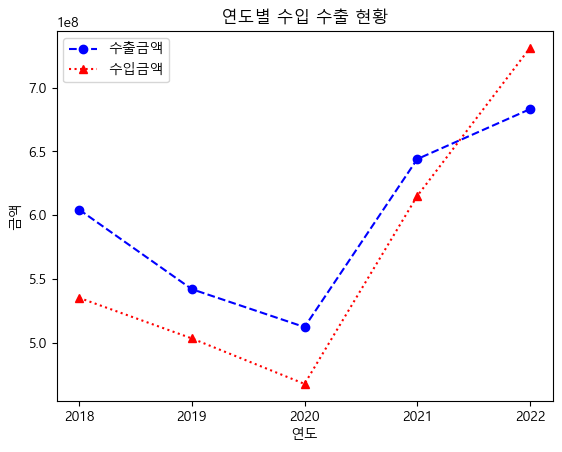

In [12]:
plt.plot(df2.index, df2['수출금액'], 'bo--', label='수출금액')
plt.plot(df2.index, df2['수입금액'], 'r^:', label='수입금액')

plt.title('연도별 수입 수출 현황')
plt.xlabel('연도')
plt.ylabel('금액')
plt.legend()
plt.show()